In [4]:
import genjax
import jax
import jax.numpy as jnp
import numpy as np

import matplotlib.pyplot as plt

In [88]:
def random_walk_2d(steps, phi, box_size, x_start, y_start, periodic=True):
    xs = []
    ys = []
    x = x_start
    y = y_start
    xs.append(x)
    ys.append(y)

    for i in range(len(steps)):
        step_size = steps[i]
        delta_x = jnp.cos(phi[i]) * step_size
        delta_y = jnp.sin(phi[i]) * step_size
        x = x + delta_x
        y = y + delta_y
        if periodic:
            x = jnp.mod(x, box_size)
            y = jnp.mod(y, box_size)
        else:
            x = jnp.clip(x, 0, box_size)
            y = jnp.clip(y, 0, box_size)
        xs.append(x)
        ys.append(y)
    
    return xs, ys

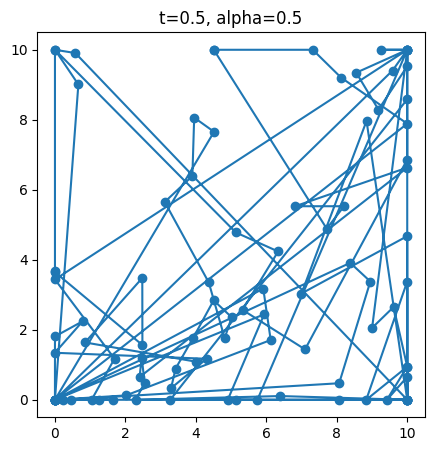

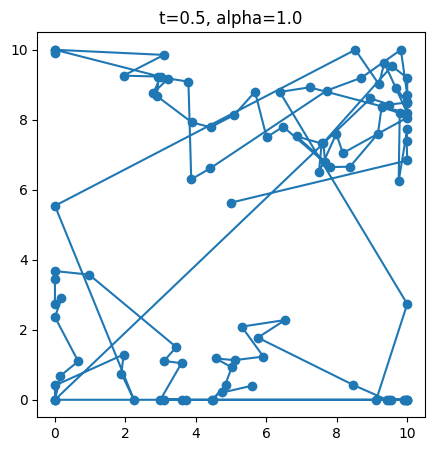

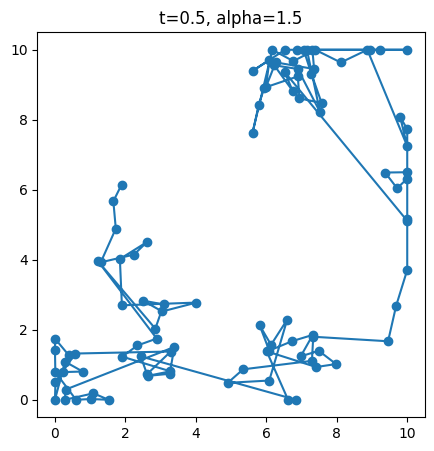

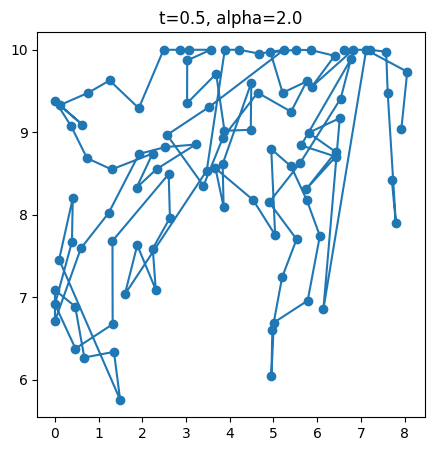

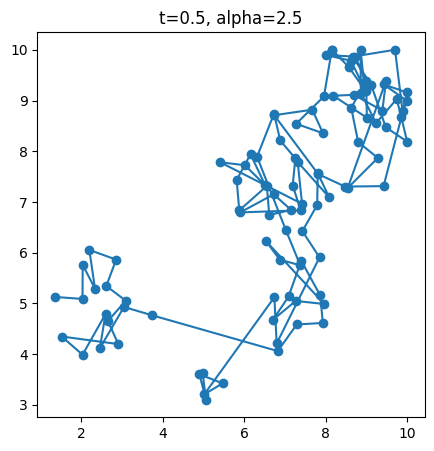

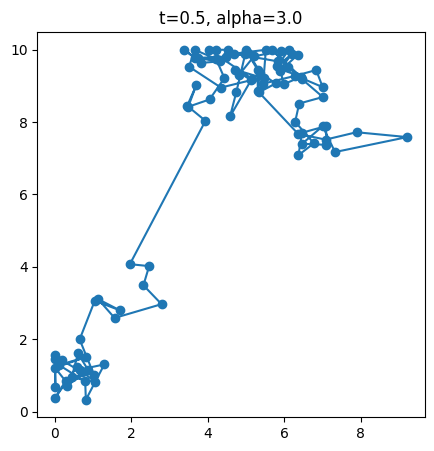

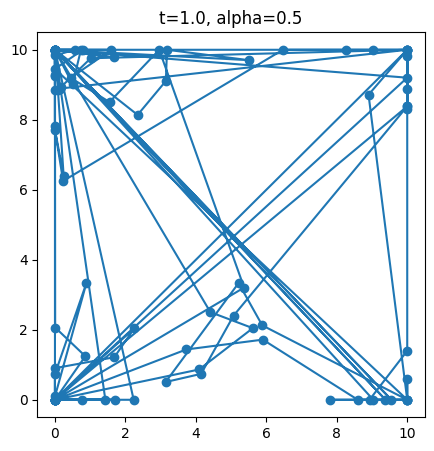

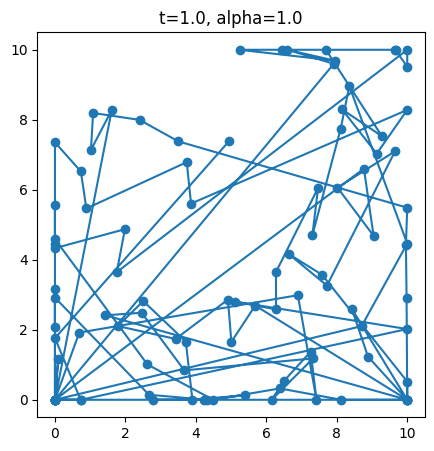

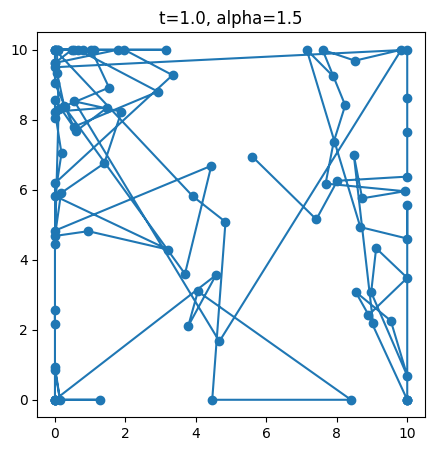

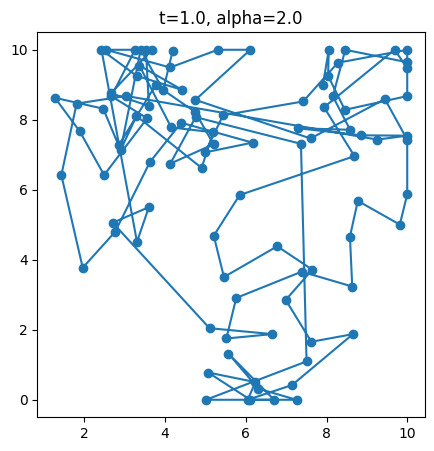

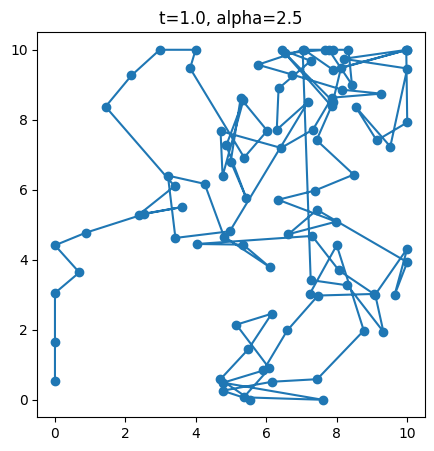

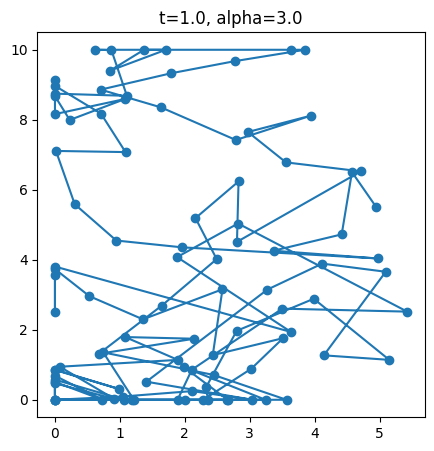

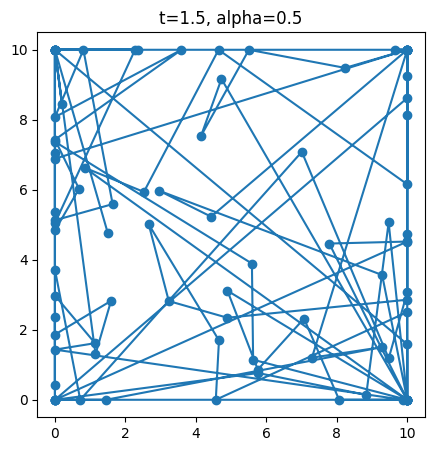

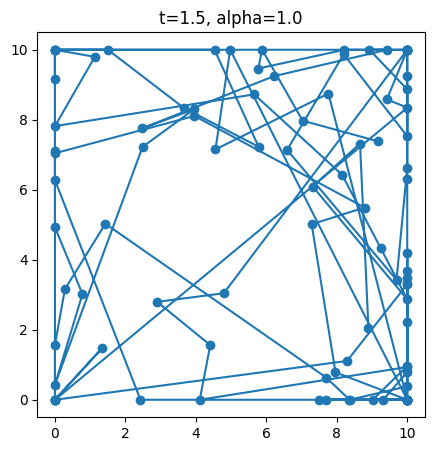

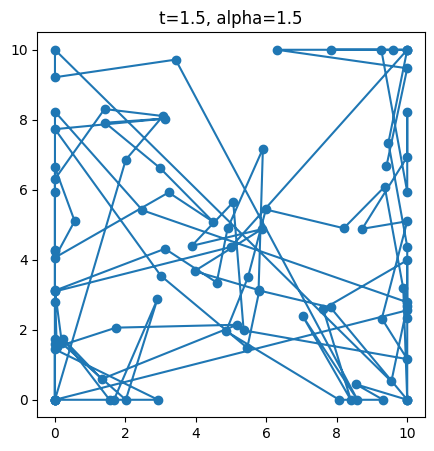

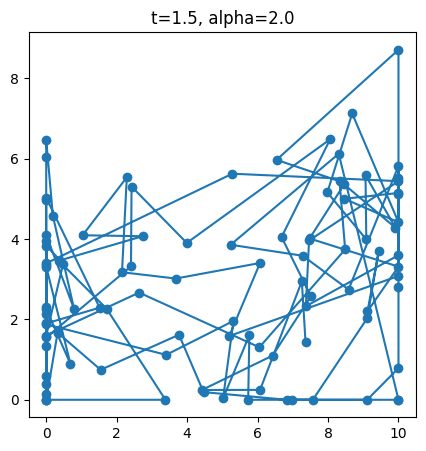

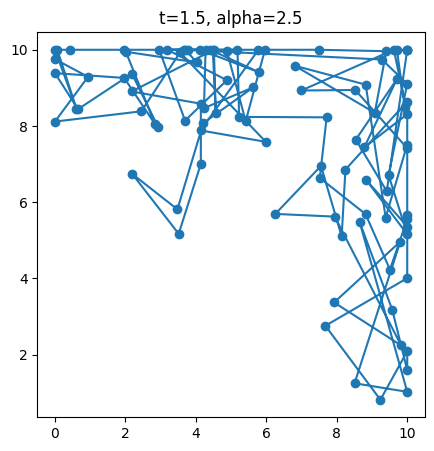

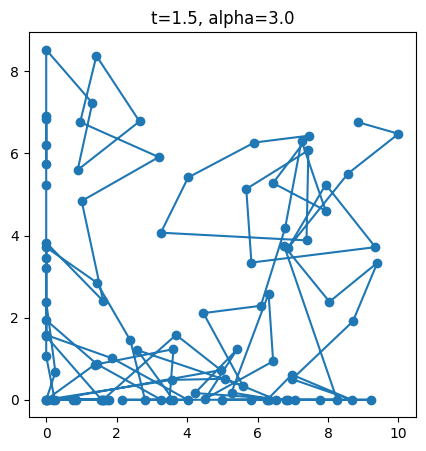

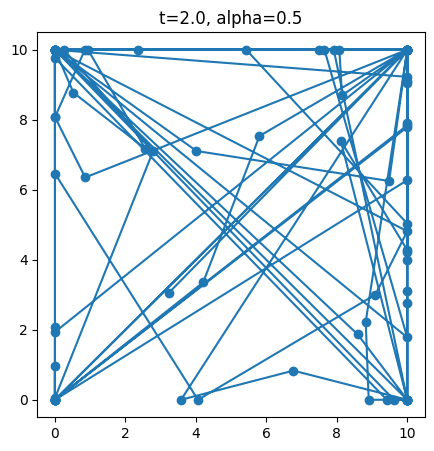

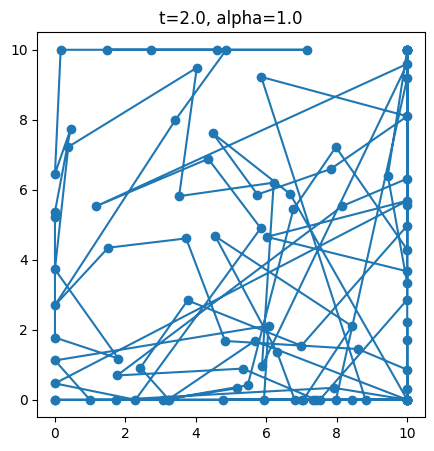

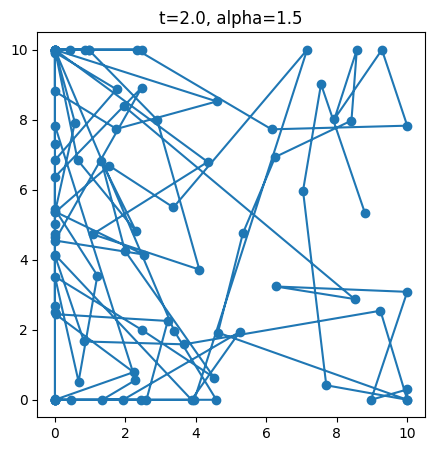

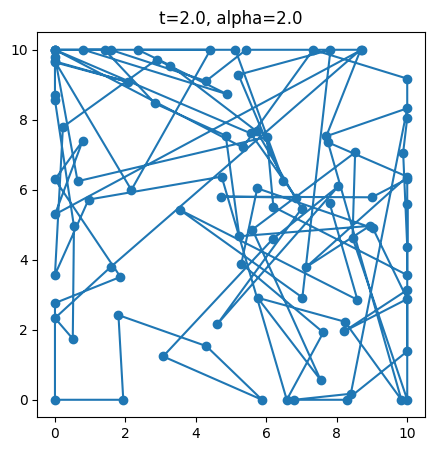

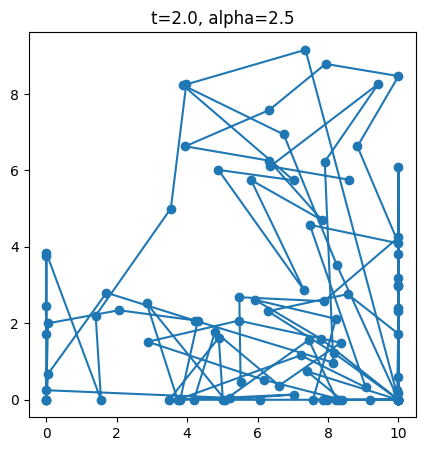

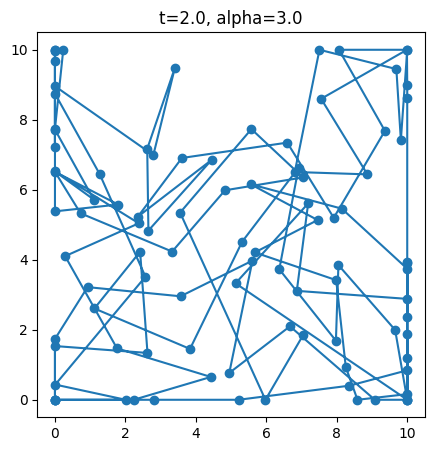

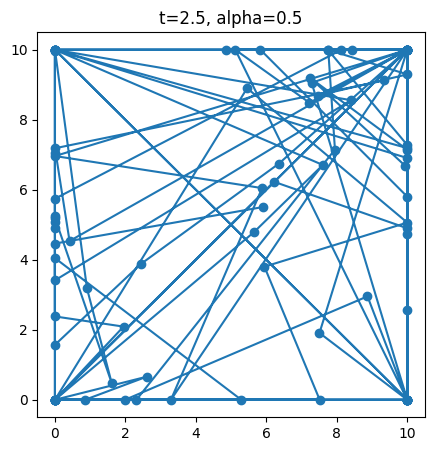

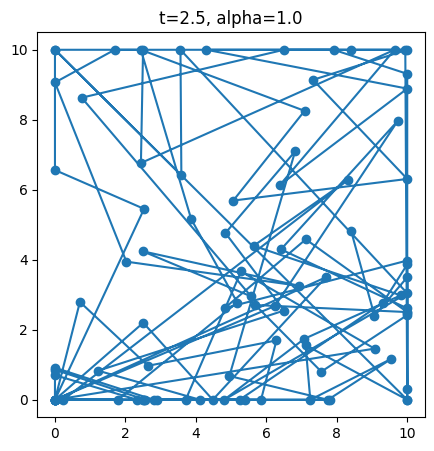

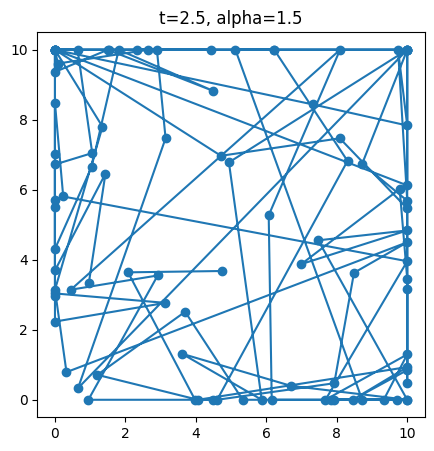

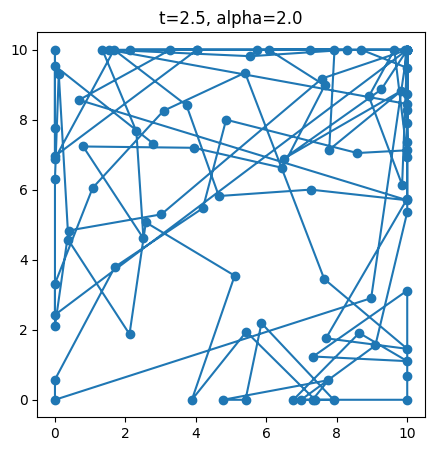

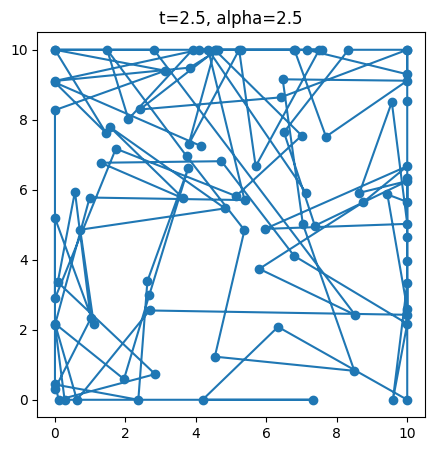

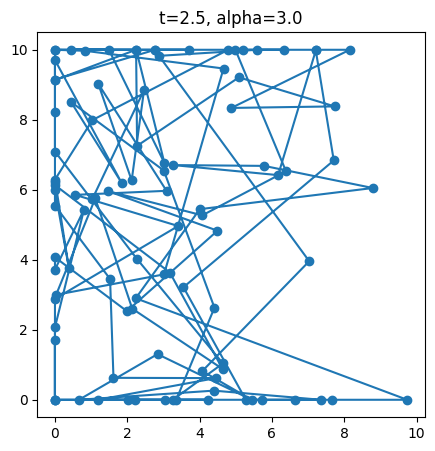

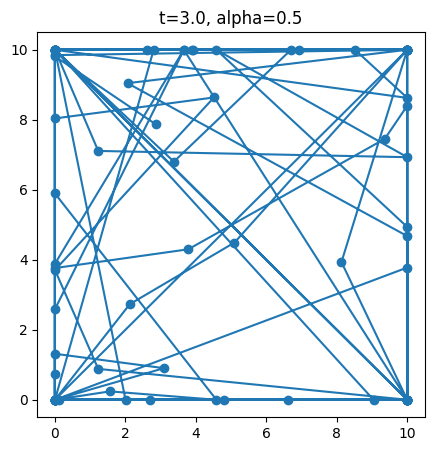

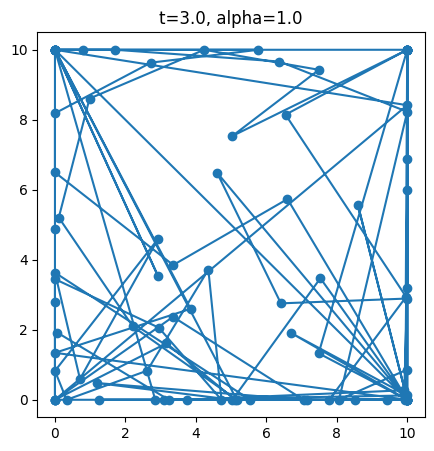

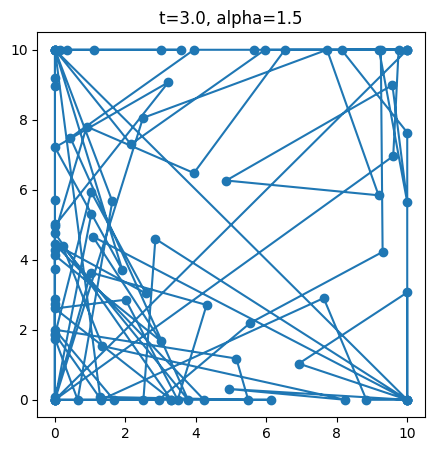

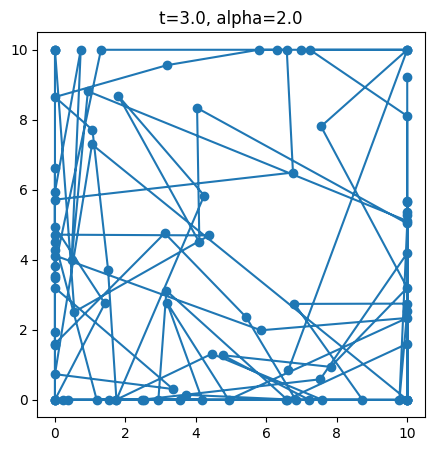

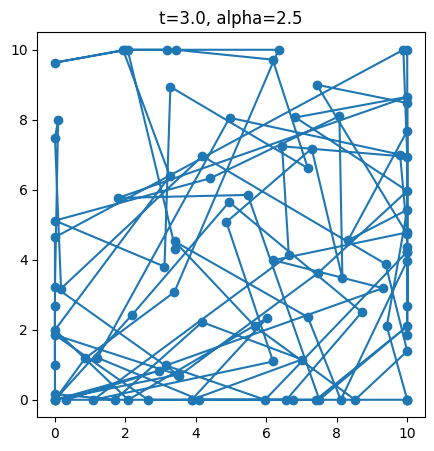

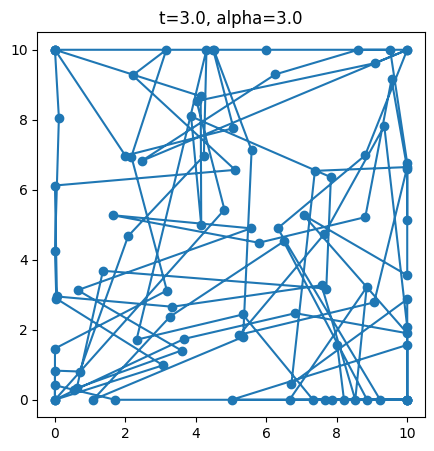

In [131]:
def get_random_flight(num_steps, mode='3D', box_size=10., periodic=True,
                      t_0=1.5, alpha=1.5):
    """Generates a random realisation of a 'Levy flight'-like distribution. The random step sizes are defined by the
    user.

    Parameters
    ----------
    steps : array
        Distribution of step sizes defined by the user.
    mode : {'2D', '3D'}, optional
        Defines whether the distribution is defined in 2D or 3D cartesian coordinates.
    box_size : float
        Length of the periodic box across one axis.
    periodic : bool
        If True then this sets periodic boundary conditions on the Levy flight realisation. If False, the box_size
        parameter is ignored.

    Returns
    -------
    x, y, z : array
        Distribution of random walk particles. z is only outputed if this is a 3D distribution.

    Internal
    --------
    _x_start, _y_start, _z_start : array
        Starting position of the distribution.
    _size : int
        The size of the distribution, 1 + size of the step_sizes array.
    """
    _u = np.random.uniform(0., 1., num_steps - 1)
    steps = t_0 / (1. - _u) ** (1. / alpha)
    
    _x_start = np.random.uniform(0., box_size, 1)[0]
    _y_start = np.random.uniform(0., box_size, 1)[0]
    _phi = np.random.uniform(0., 2. * np.pi, num_steps)
    x, y = random_walk_2d(steps, _phi, box_size, _x_start, _y_start, periodic=periodic)
    return x, y

for t in np.arange(0.5, 3.5, 0.5):
    for alpha in np.arange(0.5, 3.5, 0.5):
        xs, ys = get_random_flight(100, periodic=False, t_0=t, alpha=alpha)
        fig = plt.figure(figsize=(5, 5))
        plt.plot(xs, ys)
        plt.scatter(xs, ys)
        plt.title(f"{t=}, {alpha=}")
        plt.show()

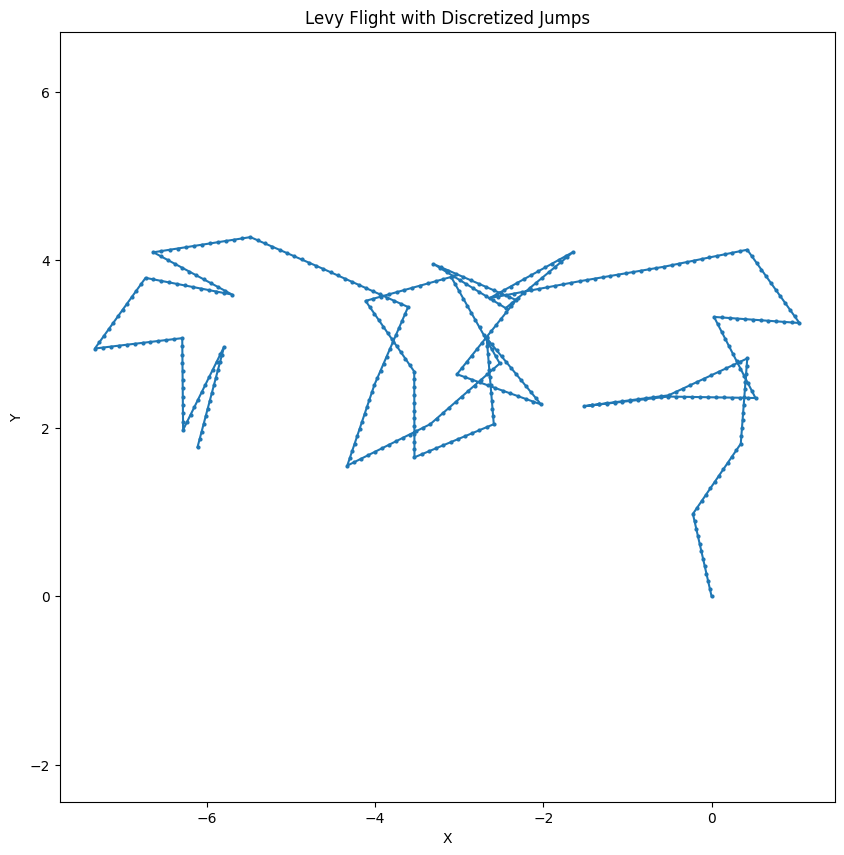

In [130]:
def levy_flight(num_steps, max_step=0.1, alpha=15):
    """
    Simulates a Levy flight with discretized long jumps.

    Parameters:
    - num_steps: Number of steps in the flight.
    - max_step: Maximum distance a bug can move in one step.
    - alpha: Stability parameter for the Levy distribution (0 < alpha <= 2).

    Returns:
    - A tuple of (x, y) coordinates representing the bug's path.
    """
    x, y = [0], [0]  # Start at origin
    directions = np.random.uniform(0, 2*np.pi, num_steps)
    step_sizes = np.random.pareto(alpha, num_steps) + 1  # Pareto distribution for step sizes

    for direction, step_size in zip(directions, step_sizes):
        # Discretize step_size if it's larger than max_step
        num_substeps = int(np.ceil(step_size / max_step))
        substep_size = step_size / num_substeps
        for _ in range(num_substeps):
            x.append(x[-1] + np.cos(direction) * min(substep_size, max_step))
            y.append(y[-1] + np.sin(direction) * min(substep_size, max_step))

    return x, y

# Simulate a Levy flight
num_steps = 40
x, y = levy_flight(num_steps)

# Plot the flight path
plt.figure(figsize=(10, 10))
plt.plot(x, y, '-o', markersize=2)
plt.title('Levy Flight with Discretized Jumps')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()